# **<u>Report - CO2 Emissions</u>**
This analysis is part of the WINC Academy course: 'Data Analytics with Python - Module 7'.

## <u>Gathering data</u>
For this assignment I am allowed to use any dataset for the following website: https://ourworldindata.org/

__List of datasources:__

co2-by-sector: https://ourworldindata.org/grapher/co-emissions-by-sector
_Emissions are measured in tonnes of carbon dioxide equivalents (CO₂e), based on 100-year global warming potential factors for non-CO₂ gases. Emissions are broken down by sector. _

co2-per-capita: https://ourworldindata.org/grapher/co-emissions-per-capita
_Carbon dioxide (CO₂) emissions from fossil fuels and industry. Land use change is not included._

co2-per-capita-consumption-vs-production: https://ourworldindata.org/grapher/consumption-vs-production-co2-per-capita
_Consumption-based emissions are national emissions that have been adjusted for trade. This measures fossil fuel and industry emissions. Land use change is not included._

co2-per-capita-vs-gdp: https://ourworldindata.org/grapher/co2-emissions-vs-gdp
_This measures CO₂ emissions from fossil fuels and industry only – land use change is not included._

energy-consumption-global: https://ourworldindata.org/grapher/global-energy-substitution
_Primary energy is calculated based on the 'substitution method' which takes account of the inefficiencies in fossil fuel production by converting non-fossil energy into the energy inputs required if they had the same conversion losses as fossil fuels._

energy-cost: https://ourworldindata.org/grapher/levelized-cost-of-energy
_The average cost per unit of energy generated across the lifetime of a new power plant. This data is expressed in US dollars per kilowatt-hour, adjusted for inflation._

energy-per-capita-source-stacked: https://ourworldindata.org/grapher/per-capita-energy-source-stacked
_Primary energy is calculated based on the 'substitution method' which takes account of the inefficiencies in fossil fuel production by converting non-fossil energy into the energy inputs required if they had the same conversion losses as fossil fuels._

population-density: https://ourworldindata.org/grapher/population-density
_The number of people per km² of land area._

registered-vehicles-per-1000-people: https://ourworldindata.org/grapher/registered-vehicles-per-1000-people
_The total number of registered vehicles (i.e. vehicles reported to a government agency and given some form of registration) per 1,000 people in each country._

## <u>Modeling approach</u>
After gathering all of the above mentioned datasets I noticed that some datasets have more recent data available than others. Depending on which datasets are used, I mostly use the most recent data from each dataset.
I have chosen to do this because I wanted to base my analysis on the most recent data available, which makes more likely to spot early changes in CO2 emissions.
Note that this does have influence on the consistency due the use of mismatching time periods.

<br>

## **Analysis: What is the biggest predictor of a large CO2 output per capita of a country?**

### Datasources used for this analysis
 - co2-by-sector
 - co2-per-capita
 - co2-per-capita-consumption-vs-production
 - co2-per-capita-vs-gdp
 - energy-per-capita-source-stacked
 - registered-vehicles-per-1000-people

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import mplcursors    # not supported by Google Colab
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%load_ext google.colab.data_table
%matplotlib inline

In [ ]:
### BIGGEST CO2 ANALYSIS
## Find the biggest CO2 emitting countries per capita for 2021
df_co2_per_capita = pd.read_csv("data/co2-per-capita.csv")    # Most recent data = 2021
df_co2_per_capita.dropna(subset=['Code'], inplace=True)
df_co2_per_capita = df_co2_per_capita.drop(df_co2_per_capita[df_co2_per_capita['Entity'] == 'World'].index)

df_co2_per_capita_2021 = df_co2_per_capita[df_co2_per_capita['Year'] == 2021]
df_co2_per_capita_2021_sorted = df_co2_per_capita_2021.sort_values('Annual CO₂ emissions (per capita)', ascending=False)

top_50 = list(df_co2_per_capita_2021_sorted['Entity'].head(50))

In [ ]:
# Top 50 (countries) - CO2 emissions per capita
df_co2_per_capita_2021_sorted.head(50)

,Entity,Code,Year,Annual CO₂ emissions (per capita)
19814,Qatar,QAT,2021,35.587307
2485,Bahrain,BHR,2021,26.663702
13217,Kuwait,KWT,2021,24.972116
24175,Trinidad and Tobago,TTO,2021,23.677477
4017,Brunei,BRN,2021,23.531528
25155,United Arab Emirates,ARE,2021,21.792141
16954,New Caledonia,NCL,2021,19.096947
20840,Saudi Arabia,SAU,2021,18.702990
18568,Oman,OMN,2021,17.916525
1950,Australia,AUS,2021,15.091471


In [ ]:
### SECTOR ANALYSIS
## Find the biggest CO2 contributing sector per country per year
df_sector = pd.read_csv("data/co2-by-sector.csv")     # Most recent data = 2019
df_sector.dropna(subset=['Code'], inplace=True)
df_sector = df_sector.drop(df_sector[df_sector['Entity'] == 'World'].index)
df_sector.fillna(0, inplace=True)

columns_to_check = ['Buildings', 'Industry', 'Land-use change and forestry', 'Other fuel combustion', 'Transport',
                   'Manufacturing and construction', 'Fugitive emissions', 'Electricity and heat']

df_sector['Biggest sector'] = df_sector[columns_to_check].abs().idxmax(axis=1)  # .idxmax() returns the index label of the max value

# Calculate the relative size of the biggest sector vs total
absolute_total = df_sector[columns_to_check].abs().sum(axis=1)
df_sector['Relative size'] = df_sector[columns_to_check].abs().div(absolute_total, axis=0).max(axis=1)

# Select the latest year (2019) for every country
year_2019 = df_sector['Year'] == 2019
df_sector_2019 = df_sector.loc[year_2019, ['Entity', 'Year', 'Biggest sector', 'Relative size']]

# Total emissions by sector
sum_columns = df_sector[columns_to_check].sum()
sum_columns = sum_columns.sort_values(ascending=False)

# Convert total to relative percentages
total_sum = sum_columns.sum()
relative_percentages = (sum_columns / total_sum) * 100

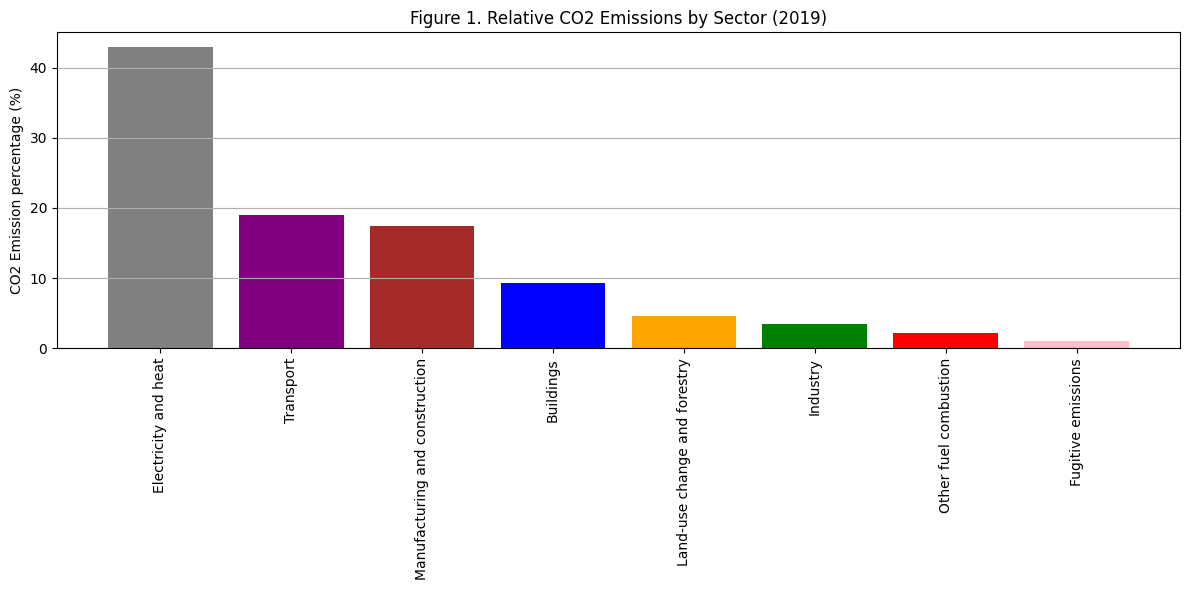

In [ ]:
# Bar chart - Total CO2 emissions by sector (2019)
# Assign colors to each sector
sector_colors = {
    'Buildings': 'blue',
    'Industry': 'green',
    'Land-use change and forestry': 'orange',
    'Other fuel combustion': 'red',
    'Transport': 'purple',
    'Manufacturing and construction': 'brown',
    'Fugitive emissions': 'pink',
    'Electricity and heat': 'gray'
}

plt.figure(figsize=(12, 6))
plt.bar(relative_percentages.index, relative_percentages.values, color=['gray', 'purple', 'brown', 'blue', 'orange', 'green', 'red', 'pink'])

plt.xticks(rotation=90)
plt.ylabel("CO2 Emission percentage (%)")
plt.title("Figure 1. Relative CO2 Emissions by Sector (2019)")
plt.grid(axis='y')

plt.tight_layout()

Figure 1. (see above) shows the relative amount of CO2 emissions by sector. Note: **'Electricity and heat'** is by far the biggest contributor, therefor this sector will be the main focus for this analysis.

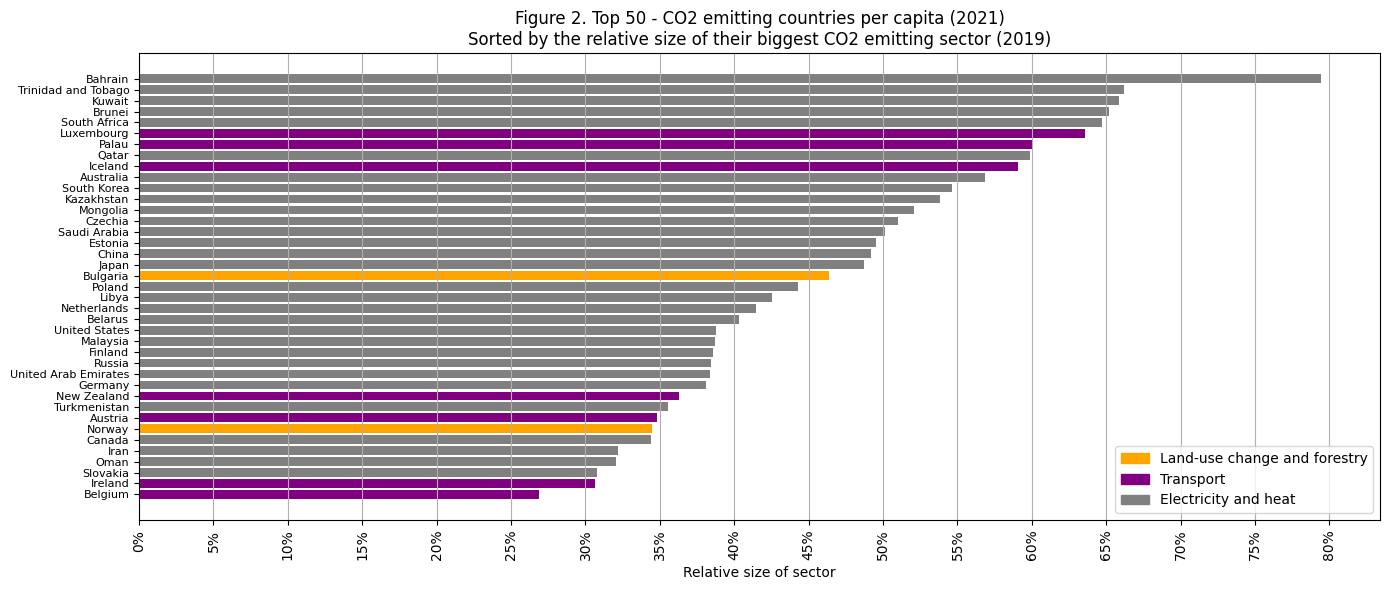

In [ ]:
# Bar chart - Relative size of biggest sector per country (2019)
df_top_50 = df_sector_2019[df_sector_2019['Entity'].isin(top_50)]
df_top_50 = df_top_50.sort_values('Relative size', ascending=True)
unique_sectors = ['Land-use change and forestry', 'Transport', 'Electricity and heat']

fig, ax = plt.subplots(figsize=(14, 6))

# Iterate over each entity and plot the horizontal bar chart
for index, row in df_top_50.iterrows():
    entity = row['Entity']
    sector = row['Biggest sector']
    relative_size = row['Relative size']
    color = sector_colors[sector]
    
    ax.barh(entity, relative_size, color=color)

ax.yaxis.set_tick_params(labelsize=8)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
plt.xticks(rotation=90)

ax.set_xlabel('Relative size of sector')
ax.set_title('Figure 2. Top 50 - CO2 emitting countries per capita (2021)\nSorted by the relative size of their biggest CO2 emitting sector (2019)')

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=sector_colors[sector]) for sector in unique_sectors]
ax.legend(legend_handles, unique_sectors, loc='lower right')
ax.grid(axis='x')

fig.tight_layout()

Figure 2. (see above) shows the Top 50 countries with the highest CO2 emissions per capita. The countries are sort on the relative size of their biggest CO2 emitting sector. Note: While **'Electricity and heat'** is strongly represented among the Top 50 countries, there are also countries that have a different sector.

Through this analysis I want to show that the answer to the first question of this assignment can't simply be answer with one factor, but will probably be a combination of **multiple factors**.

In [ ]:
### CORRILATION ANALYSIS
## Read in the data
df0 = pd.read_csv("data/co2-per-capita.csv")
df1 = pd.read_csv("data/co2-vs-gdp.csv")
df2 = pd.read_csv("data/energy-per-capita-source-stacked.csv")
df3 = pd.read_csv("data/registered-vehicles-per-1000-people.csv")
df4 = pd.read_csv("data/population-density.csv")
df5 = pd.read_csv("data/co2-per-capita-consumption-vs-production.csv")
df6 = pd.read_csv("data/co2-by-sector.csv")

# Filter data per dataset
df0.dropna(subset=['Code'], inplace=True)
df0 = df0.drop(df0[df0['Entity'] == 'World'].index)
df0.drop(['Code'], axis=1, inplace=True)
df0 = df0[df0['Year'] == 2021]          # Selecting '2021' = most recent year available
df0 = df0.rename(columns={'Annual CO₂ emissions (per capita)': 'CO₂ emissions per capita'})

df1.dropna(subset=['Code'], inplace=True)
df1 = df1.drop(df1[df1['Entity'] == 'World'].index)
df1.drop(['Code', '417485-annotations', 'Annual CO₂ emissions (per capita)', 'Population (historical estimates)', 'Continent'], axis=1, inplace=True)
df1.dropna(inplace=True)
df1 = df1[df1['Year'] == 2018]          # Selecting '2018' due lots of missing data in later years

df2.dropna(subset=['Code'], inplace=True)
df2 = df2.drop(df2[df2['Entity'] == 'World'].index)
df2.drop(['Code'], axis=1, inplace=True)
df2 = df2[df2['Year'] == 2021]          # Selecting '2021' = most recent year available
df2 = df2.rename(columns={'Fossil fuels per capita (kWh)': 'Fossil per capita (kWh)', 'Nuclear per capita (kWh - equivalent)': 'Nuclear per capita (kWh)', 'Renewables per capita (kWh - equivalent)': 'Renewables per capita (kWh)'})
df2.fillna(0, inplace=True)
df2['Total energy per capita (kWh)'] = df2['Fossil per capita (kWh)'] + df2['Nuclear per capita (kWh)'] + df2['Renewables per capita (kWh)']

df3.dropna(subset=['Code'], inplace=True)
df3 = df3.drop(df3[df3['Entity'] == 'World'].index)
df3.drop(['Code'], axis=1, inplace=True)
df3 = df3[df3['Year'] == 2016]          # Selecting '2016' = most recent year available
df3 = df3.rename(columns={'Registered vehicles per 1,000 people': 'Vehicles per 1,000 people'})

df4.dropna(subset=['Code'], inplace=True)
df4 = df4.drop(df4[df4['Entity'] == 'World'].index)
df4.drop(['Code'], axis=1, inplace=True)
df4 = df4[df4['Year'] == 2021]          # Selecting '2021' = aligning with other datasets

df5.dropna(subset=['Code'], inplace=True)
df5 = df5.drop(df5[df5['Entity'] == 'World'].index)
df5.drop(['Code', 'Share of world population', 'Income classifications (World Bank (2017))'], axis=1, inplace=True)
df5.dropna(inplace=True)
df5['CO₂ consumption vs production (%)'] = round(df5['Annual consumption-based CO₂ emissions (per capita)'] / df5[ 'Annual CO₂ emissions (per capita)'] * 100, 2)
df5.drop(['Annual consumption-based CO₂ emissions (per capita)', 'Annual CO₂ emissions (per capita)'], axis=1, inplace=True)
df5 = df5[df5['Year'] == 2020]          # Selecting '2020' = most recent year, 2021 has a lot of missing data

df6.dropna(subset=['Code'], inplace=True)
df6 = df6.drop(df6[df6['Entity'] == 'World'].index)
df6.drop(['Code', 'Buildings', 'Industry', 'Other fuel combustion', 'Transport', 'Manufacturing and construction', 'Fugitive emissions', 'Electricity and heat'], axis=1, inplace=True)
df6.dropna(inplace=True)
df6 = df6[df6['Year'] == 2019]          # Selecting '2019' = most recent year

# Merge datasets together on 'Entity' (Note: data from different kind of year (latest year possible))
merged_df = df0.merge(df1, on='Entity', how='left', suffixes=('_df0', '_df1'))
merged_df = merged_df.merge(df2, on='Entity', how='left', suffixes=('_df1', '_df2'))
merged_df = merged_df.merge(df3, on='Entity', how='left', suffixes=('_df2', '_df3'))
merged_df = merged_df.merge(df4, on='Entity', how='left', suffixes=('_df3', '_df4'))
merged_df = merged_df.merge(df5, on='Entity', how='left', suffixes=('_df4', '_df5'))
merged_df = merged_df.merge(df6, on='Entity', how='left', suffixes=('_df5', '_df6'))

# Dropping Year-columns and NaN values of merged DataFrame (total: 219 countries)
merged_df.set_index('Entity', inplace=True)
merged_df.drop(columns=[f'Year_df{i}' for i in range(6)], inplace=True)
merged_df.drop(columns='Year', inplace=True)
merged_df.dropna(inplace=True)         # Leaving only 49 countries

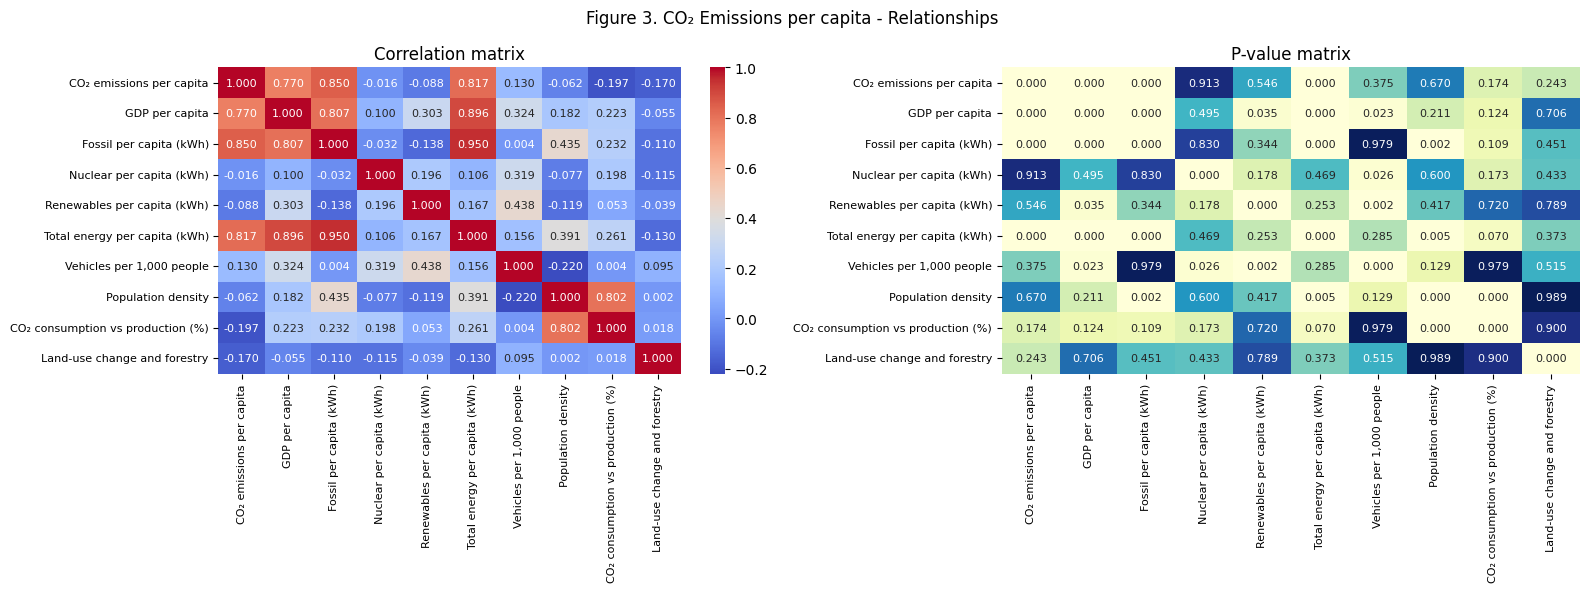

In [ ]:
# Corrilations & P-values heatmap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("Figure 3. CO₂ Emissions per capita - Relationships ")

correlation_matrix = merged_df.corr()
p_values = np.zeros_like(correlation_matrix.values)
for i in range(len(merged_df.columns)):
    for j in range(len(merged_df.columns)):
        _, p_val = stats.pearsonr(merged_df[merged_df.columns[i]], merged_df[merged_df.columns[j]])
        p_values[i, j] = p_val

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax1, fmt='.3f', annot_kws={'size': 8})
sns.heatmap(p_values, annot=True, cmap='YlGnBu', ax=ax2, cbar=False, fmt='.3f', annot_kws={'size': 8})

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)
ax1.set_title('Correlation matrix')

ax2.set_xticklabels(merged_df.columns, rotation=90, fontsize=8)
ax2.set_yticklabels(merged_df.columns, rotation=0, fontsize=8)
ax2.set_title('P-value matrix')

fig.tight_layout()

Figure 3. (see above) shows a correlation matrix and a p-value matrix. The goal here is to find variables that have a **strong relationship** with CO2 emission per capita. Note: **'Fossil'** and **'Total energy'** are strongly (positive) corrilated to CO2 emissions per capita. **'CO2 consumption vs production'** and **'Land-use change and forestry'** are weakly (negative) corrilated to CO2 emissions per capita.

Although the goal is to find the **biggest predictor** of high CO2 emissions per capita, I don't want to neglect **'CO2 consumption vs production'** and **'Land-use change and forestry'**. They have a (decent) **negative impact** on CO2 emissions, which could mean that countries with seemingly high CO2 emissions per capita are in fact (a bit) lower. 

Note: CO2 emission numbers for 'Land-use change' are not included in most datasets (as stated in the datasources).

In [ ]:
### GDP ANALYSIS
## Read in the data and select 2018 (latest year)
df_gdp = pd.read_csv("data/co2-vs-gdp.csv")
df_gdp.dropna(subset=['Code'], inplace=True)
df_gdp = df_gdp.drop(df_gdp[df_gdp['Entity'] == 'World'].index)
df_gdp.drop(['Code', '417485-annotations', 'Population (historical estimates)', 'Continent'], axis=1, inplace=True)
df_gdp = df_gdp[df_gdp['Year'] == 2018]   # Most recent year available
df_gdp.dropna(inplace=True)

<ipython-input-9-f231e55e233d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp.dropna(inplace=True)


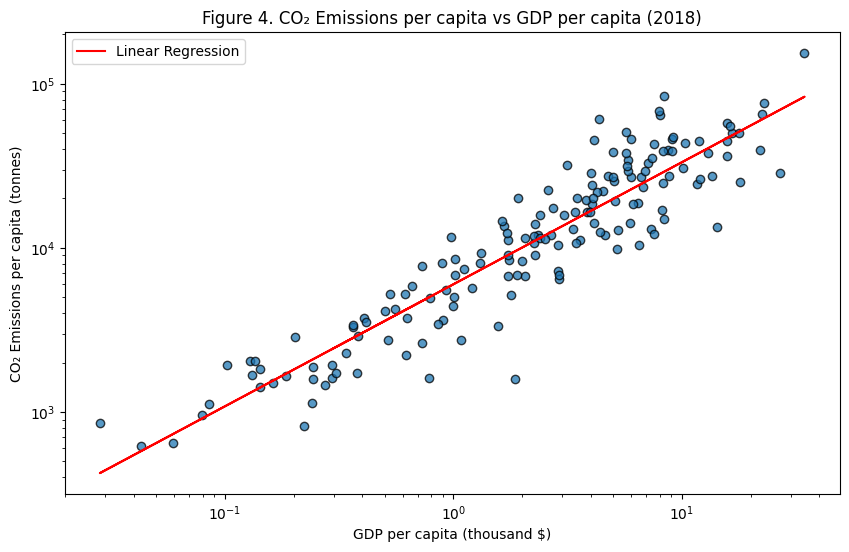

In [ ]:
## Scatter plot - CO2 per capita vs GDP per capita
x = df_gdp['Annual CO₂ emissions (per capita)']
y = df_gdp['GDP per capita']

# Logarithmic transformation
x_log = np.log10(x)
y_log = np.log10(y)

# Linear regression (logarithmic scale)
slope, intercept = np.polyfit(x_log, y_log, 1)
regression_line = slope * x_log + intercept

plt.figure(figsize=(10, 6))

plt.scatter(x, y, edgecolor='black', alpha=0.75)
plt.plot(x, 10**(regression_line), color='red', label='Linear Regression')

plt.xscale('log')       # Set plot to logarithmic scale
plt.yscale('log')

plt.xlabel('GDP per capita (thousand $)')
plt.ylabel('CO₂ Emissions per capita (tonnes)')
plt.title('Figure 4. CO₂ Emissions per capita vs GDP per capita (2018)')
plt.legend()

fig.tight_layout()

Figure 4. (see above) shows the relation between **'CO2 emissions per capita'** and **'GPD per capita'**. Due the logarithmic scale the labels on the x- and y-axis are harder to read. Note: There is a **strong** (positive) relation between these two variables.

As shown with the linear regression line: It seems when 'GDP per capita' rises the 'CO2 emissions per capita' also **rises in a linear fashion**. 

In [ ]:
### ENERGY ANALYSIS
## Read in the data and select 2021
df_energy_sources = pd.read_csv("data/energy-per-capita-source-stacked.csv")
df_energy_sources = df_energy_sources.drop(df_energy_sources[df_energy_sources['Entity'] == 'World'].index)
df_energy_sources.dropna(subset=['Code'], inplace=True)
df_energy_sources.fillna(0, inplace=True)
df_energy_sources = df_energy_sources[df_energy_sources['Year'] == 2021]  # Most recent year

# Merge with dataframe 'CO2 per capita'
df_energy_sources = df_energy_sources.merge(df_co2_per_capita_2021[['Entity', 'Annual CO₂ emissions (per capita)']], on='Entity', how='left')

# Calculate energy usage per capita
df_energy_sources['Total'] = df_energy_sources['Fossil fuels per capita (kWh)'] + df_energy_sources['Nuclear per capita (kWh - equivalent)'] + df_energy_sources['Renewables per capita (kWh - equivalent)']

# Sort dataframe
df_energy_sources_sorted = df_energy_sources.sort_values('Annual CO₂ emissions (per capita)', ascending=False)

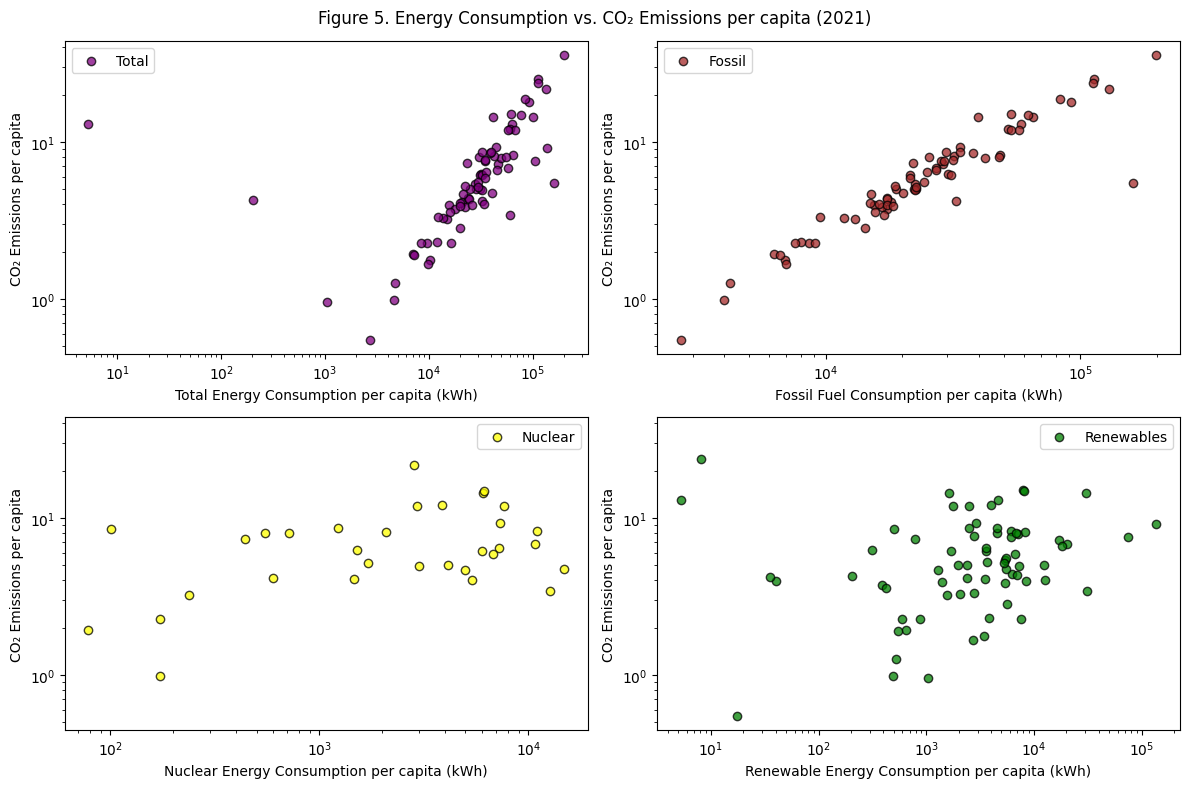

In [ ]:
## Scatter plot - Energy per capita vs CO2 per capita
# Data
x_total = df_energy_sources['Total']
x_fossil = df_energy_sources['Fossil fuels per capita (kWh)']
x_nuclear = df_energy_sources['Nuclear per capita (kWh - equivalent)']
x_renewables = df_energy_sources['Renewables per capita (kWh - equivalent)']
y = df_energy_sources['Annual CO₂ emissions (per capita)']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Figure 5. Energy Consumption vs. CO₂ Emissions per capita (2021)')

# Subplot - Total Energy 
axs[0, 0].scatter(x_total, y, color='purple', label='Total', edgecolor='black', alpha=0.75)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Total Energy Consumption per capita (kWh)')
axs[0, 0].set_ylabel('CO₂ Emissions per capita')
axs[0, 0].legend()

# Subplot - Fossil 
axs[0, 1].scatter(x_fossil, y, color='brown', label='Fossil', edgecolor='black', alpha=0.75)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Fossil Fuel Consumption per capita (kWh)')
axs[0, 1].set_ylabel('CO₂ Emissions per capita')
axs[0, 1].legend()

# Subplot - Nuclear
axs[1, 0].scatter(x_nuclear, y, color='yellow', label='Nuclear', edgecolor='black', alpha=0.75)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Nuclear Energy Consumption per capita (kWh)')
axs[1, 0].set_ylabel('CO₂ Emissions per capita')
axs[1, 0].legend()

# Subplot - Renewable
axs[1, 1].scatter(x_renewables, y, color='green', label='Renewables', edgecolor='black', alpha=0.75)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Renewable Energy Consumption per capita (kWh)')
axs[1, 1].set_ylabel('CO₂ Emissions per capita')
axs[1, 1].legend()

fig.tight_layout()

Figure 5. (see above) shows the relation between 'CO2 emissions per capita' and the different kind of energy sources (fossil, nuclear and renewables). Due the logarithmic scale the labels on the x- and y-axis are harder to read. **'Total energy'** has a **strong** (positive) relation with CO2 emissions per capita.

Note: **'Nuclear energy'** and **'Renewable energy'** don't seem to have a clear relation with 'CO2 emissions per capita'. It's **'Fossil energy'** that has the **most clear and strong** relation with  'CO2 emissions per capita'.

In [ ]:
### CO2 CONSUMPTION VS PRODUCTION ANALYSIS
## Read in the data and select 2020
df_co2_cons_vs_prod = pd.read_csv("data/co2-per-capita-consumption-vs-production.csv")   
df_co2_cons_vs_prod.dropna(subset=['Code'], inplace=True)
df_co2_cons_vs_prod = df_co2_cons_vs_prod.drop(df_co2_cons_vs_prod[df_co2_cons_vs_prod['Entity'] == 'World'].index)
df_co2_cons_vs_prod.drop(['Code', 'Share of world population', 'Income classifications (World Bank (2017))'], axis=1, inplace=True)
df_co2_cons_vs_prod.dropna(inplace=True)
df_co2_cons_vs_prod['CO₂ consumption vs production (%)'] = round(df_co2_cons_vs_prod['Annual consumption-based CO₂ emissions (per capita)'] / df_co2_cons_vs_prod[ 'Annual CO₂ emissions (per capita)'] * 100, 2)
df_co2_cons_vs_prod = df_co2_cons_vs_prod[df_co2_cons_vs_prod['Year'] == 2020]          # Selecting '2020' = best data, 2021 has a lot of missing data
df_co2_cons_vs_prod.set_index('Entity', inplace=True)

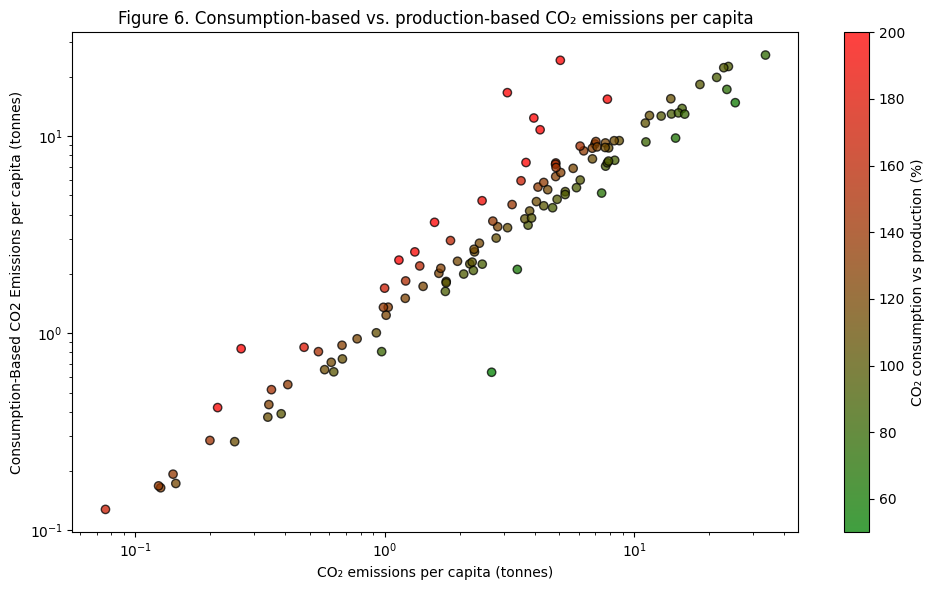

In [ ]:
## Scatter plot - Consumption- vs Production-based CO2 emissions (per capita)
countries = df_co2_cons_vs_prod.index
consumption_emissions = df_co2_cons_vs_prod['Annual consumption-based CO₂ emissions (per capita)']
production_emissions = df_co2_cons_vs_prod['Annual CO₂ emissions (per capita)']
consumption_vs_production = df_co2_cons_vs_prod['CO₂ consumption vs production (%)']

fig, ax = plt.subplots(figsize=(10, 6))

norm = colors.Normalize(vmin=50, vmax=200)
cmap = colors.LinearSegmentedColormap.from_list('TwoColorGradient', ['green', 'red'])

scatter = ax.scatter(production_emissions, consumption_emissions, c=consumption_vs_production, alpha=0.75, cmap=cmap, norm=norm, edgecolors='black')

plt.xlabel('CO₂ emissions per capita (tonnes)')
plt.ylabel('Consumption-Based CO2 Emissions per capita (tonnes)')
plt.title('Figure 6. Consumption-based vs. production-based CO₂ emissions per capita')

# # Adding labels   # Not supported by Google Colab
# tooltip = mplcursors.cursor(scatter, hover=True)

# @tooltip.connect("add")
# def on_add(sel):
#     index = sel.target.index
#     sel.annotation.set_text(f"{countries[index]}\n{consumption_vs_production[sel.index]:.2f}%")

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CO₂ consumption vs production (%)')

plt.xscale('log')       
plt.yscale('log')

plt.tight_layout()

Figure 6. (see above) shows the relation between the amount of 'CO2 emissions per capita' **consumed vs** 'CO2 emissions per capita' **produced**. Due the logarithmic scale the labels on the x- and y-axis are harder to read.

The hover effect isn't supported by Google Colab, but in Visual Studio Code (VSC) you are able to select a dot, see which country it represents and see what percentage they consume of the total 'CO2 emissions per capita' produced.

The results of this analysis may be used to apply a **correction** (based on percentage consumed) on the 'CO2 emissions per capita'. This may be a positive or negative correction. Countries that are **green** consume **less CO2 per capita** then they produce and **red** countries consume **more CO2 per capita then they produce**.

This analysis shows that countries may have a high 'CO2 emissions per capita' because of export and countries with a low 'CO2 emissions per capita' due import.

In [ ]:
### LAND-USE CHANGE & FORESTRY ANALYSIS
## Read in the data and select 2019
df_sector = df_sector[df_sector['Year'] == 2019]          # Selecting '2019' = most recent year 
df_sector = df_sector.drop(['Code', 'Year', 'Buildings', 'Industry', 'Other fuel combustion', 'Transport', 'Manufacturing and construction', 'Fugitive emissions', 'Electricity and heat', 'Biggest sector', 'Relative size'], axis=1)
df_sector = df_sector[df_sector['Land-use change and forestry'] != 0]   # All 0 values are excluded, because data is missing or no correction is needed

# Add CO2 emissions per capita to dataset
df_co2_per_capita_2019 = df_co2_per_capita[df_co2_per_capita['Year'] == 2019]
df_co2_per_capita_2019 = df_co2_per_capita_2019.drop(['Code', 'Year'], axis=1)

df_sector = df_sector.merge(df_co2_per_capita_2019, on='Entity', how='left')
df_sector.set_index('Entity', inplace=True)

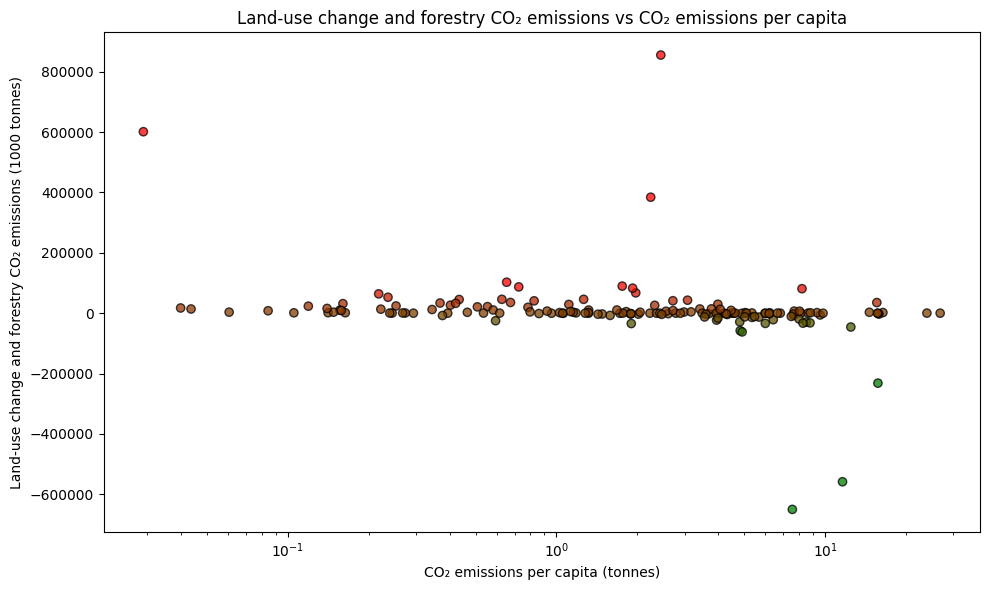

In [ ]:
## Scatter plot - Consumption- vs Production-based CO2 emissions (per capita)
fig, ax = plt.subplots(figsize=(10, 6))
x = df_sector['Annual CO₂ emissions (per capita)']
y = round(df_sector['Land-use change and forestry'] / 1000, 0)

norm = colors.Normalize(vmin=-100000, vmax=100000)
cmap = colors.LinearSegmentedColormap.from_list('TwoColorGradient', ['green', 'red'])

scatter = ax.scatter(x, y, c=y, alpha=0.75, cmap=cmap, norm=norm, edgecolors='black')

plt.xlabel('CO₂ emissions per capita (tonnes)')
plt.ylabel('Land-use change and forestry CO₂ emissions (1000 tonnes)')
plt.title('Figure 7. Land-use change and forestry CO₂ emissions vs CO₂ emissions per capita')

# # Adding labels   # Not supported by Google Colab
# tooltip = mplcursors.cursor(scatter, hover=True)

# @tooltip.connect("add")
# def on_add(sel):
#     index = sel.index
#     land_use_emissions = y[sel.index]
#     co2_per_capita = x[sel.index]
#     sel.annotation.set_text(f"Country: {df_sector.index[index]}\nLand-use change and forestry CO₂ emissions: {land_use_emissions}\nCO₂ emissions per capita: {co2_per_capita}")

# Customizing x-axis tick labels for log scale
def format_ticks(value, pos):
    return "{:.1f}".format(value)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.xscale('log')

plt.tight_layout()

Figure 7. (see above) shows the relation between the amount of **'CO2 emissions per capita' vs 'Land-use change and foresty'**. 'Land-use change and foresty' involves modifying land cover, such as deforestation, afforestation and changes in land use patterns, which have significant implications for ecosystems and climate change. 
Due the logarithmic scale the labels on the x-axis are harder to read.

The hover effect isn't supported by Google Colab, but in Visual Studio Code (VSC) you are able to select a dot, see which country it represents, see 'Land-use change and foresty' emissions and the 'CO2 emissions per capita'.

The results of this analysis may be used to apply a correction (based 'Land-use change and foresty' emissions) on the 'CO2 emissions per capita'. This may be a positive or negative correction. Countries that are **green** have **negative CO2 emissions** for 'Land-use change and foresty'. Countries that are **red** have **positive CO2 emissions** for 'Land-use change and foresty'.

Depending on 'Land-use change and foresty' emissions, countries should get a **positive or negative correction** on 'CO2 emissions per capita' to get a better more informed view of the actual 'CO2 emissions per capita' per country.

## <u>Summary</u>
Here follows a short summary of each conducted analysis:

- **Sector:**

World wide the sector _'Electricity and heat'_ is the biggest contributor to CO2 emissions.

<br>

- **Corrilation:**

When looking for positive and negative corrilations and relationships between certain variables with CO2 emissions per capita, the following came out the strongest:

_Positive corrilation: 'GDP per capita' & 'Fossil energy per capita'_

_Negative corrilation: 'CO2 consumption vs production' & 'Land-use change and forestry'_

<br>

- **Gross Domestic Product (GDP):**

GDP has a strong positive correlation with CO2 emissions. This means that countries with high GDP also tend to have high CO2 emissions.

<br>

- **Energy sources:**

Energy usage has a strong positive correlation with CO2 emissions. This means that countries with high energy usage also tend to have high CO2 emissions.

The biggest contributing energy source to CO2 emissions is _'Fossil'_.

<br>

- **CO2 consumption vs production:**

CO2 emissions on itself don't give a full view of a countries situation. Certain countries have lower consumption-based CO2 emissions than production-based CO2 emissions. This is probably caused by high export (example: fossil fuels) and visa versa for countries with high imports. Therefor a correction factor should be applied to get a realistic view of the CO2 emissions of a certain country.

<br>

- **Land-use change & forestry:**

Land-use change isn't included in most datasets, but may have a big influence on the CO2 emissions of a country. Therefor a correction factor should be applied to get a realistic view of the CO2 emissions of a certain country.


## **Conclusion: What is the biggest predictor of a large CO2 output per capita of a country?**

As stated above, it's hard to pick only one predictor of a large CO2 output per capita of a certain country. It strongly depends on a combination of multiple and different factors for each country. 

To give a general reason of a high CO2 output per capita of a country, I state the following:

- High energy usage (mainly consisting of 'fossil');
- High GDP;
- Are exporters of 'fossil fuels';
- Have a negative influence towards the envorinment (like: deforestation). 

